## Question 1:

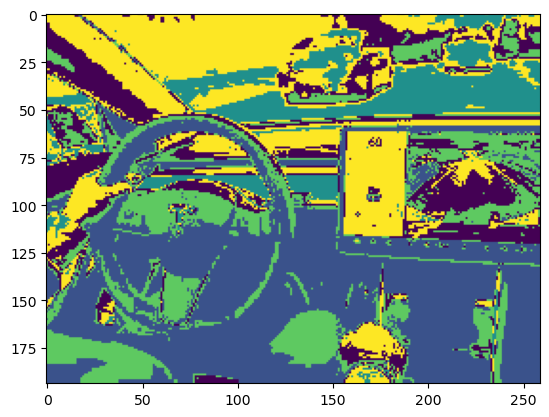

In [111]:
from skimage import io 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


img = io.imread("seg2.jpg")
plt.imshow(img)
kmeans = KMeans(n_clusters=5)
img.shape
img_vec = np.reshape(img,(194*259,3))
preds = kmeans.fit_predict(img_vec)
groups = np.reshape(preds,(194,259))
plt.imshow(groups)




## Question 2:

Define linear model using mini batch gradient descent:

In [112]:
def h(w, X):
    return np.dot(X, w)

def mse(w, X, y):
    m = y.size
    return (1 / (2 * m)) * np.sum((h(w, X) - y) ** 2)

def mini_batch_gradient_descent(X, y, alpha=0.01, batch_size=10):
    X = X.reshape(X.shape[0],1)
    y = y.reshape(y.shape[0],1)
    m, n = X.shape
    
    w = np.zeros((n, 1))
    
    w_store = []
    m, n = X.shape
    
    w = np.zeros((n, 1)) 

    J_values = []  

    indices = np.random.permutation(m)  
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    
    for i in range(0, m, batch_size):
        X_mini = X_shuffled[i:i + batch_size]  
        y_mini = y_shuffled[i:i + batch_size]  

        error = h(w, X_mini) - y_mini

        gradient = (1 / batch_size) * (X_mini.T @ error)
        w -= alpha*gradient  

        J_values.append(mse(w, X, y))
        w_store.append(w)

    return w, w_store, J_values

def predict(xval, w):
    return np.dot(xval, w)

Import housing price data:

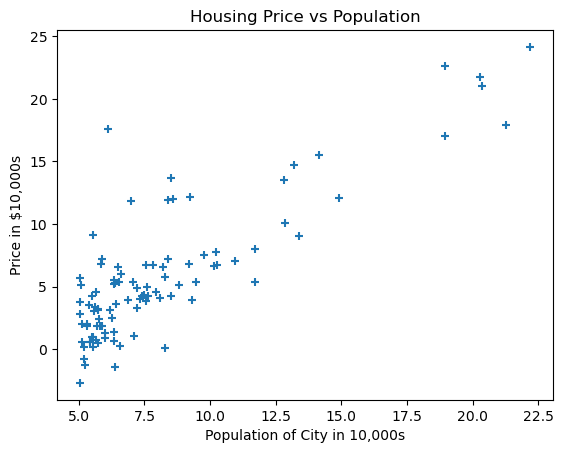

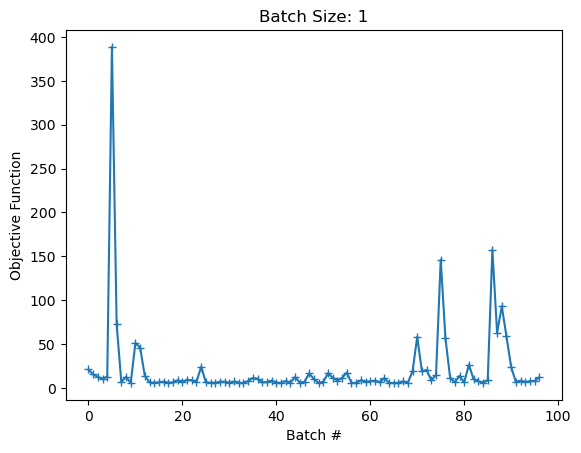

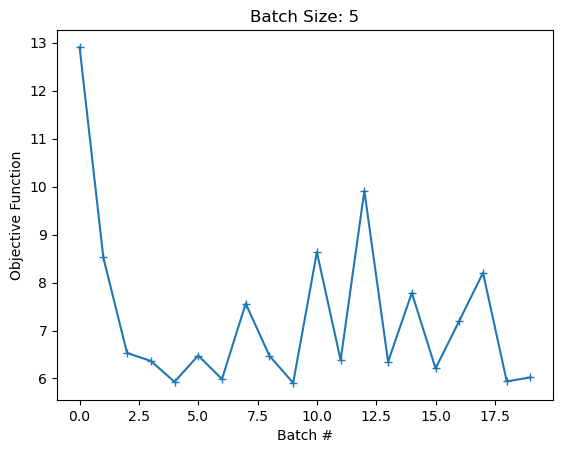

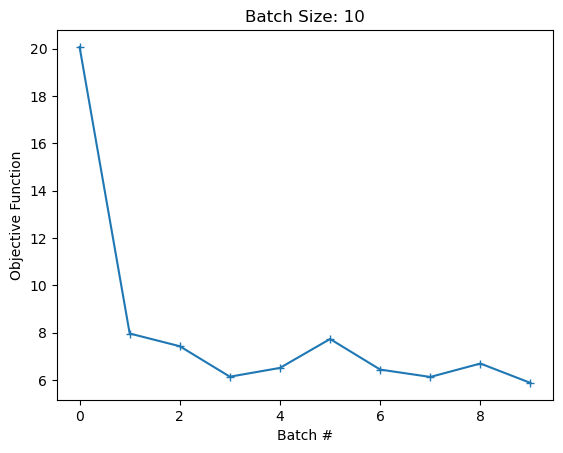

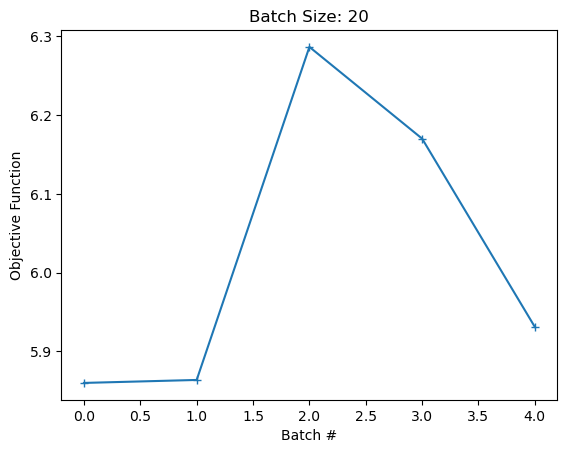

In [113]:
import pandas as pd

df = pd.read_csv("Housing data.txt",encoding='UTF-16 LE')
plt.scatter(df['Population'],df['Price'],marker='+')
plt.title("Housing Price vs Population")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Price in $10,000s")
pop_X = df['Population'].to_numpy()
pop_y = df['Price'].to_numpy()

batch_sizes = [1,5,10,20]
for batch_size in batch_sizes:
    w, w_store, J_values = mini_batch_gradient_descent(pop_X,pop_y,1e-2,batch_size)
    plt.figure()
    plt.plot(J_values,"-+")
    plt.title(f'Batch Size: {batch_size}')
    plt.xlabel("Batch #")
    plt.ylabel("Objective Function")

## Question 3

original features and their names :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


c:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

True/False Selection of features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False]
The best features are :  ['worst compactness' 'worst concavity']
Accuracy score: 0.8421052631578947


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

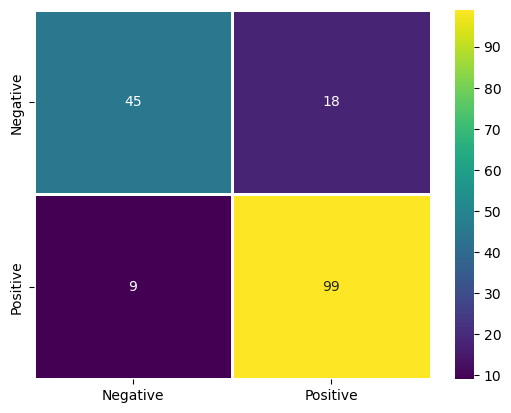

In [114]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()
X = bc["data"]
y = bc["target"]

print('original features and their names : ', bc.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(lr, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)

print('True/False Selection of features:', rfe.support_)

feature_indices = np.array([i for i in range(1,bc["feature_names"].shape[0]+1)])
feature_indices = feature_indices[rfe.support_]

plt.scatter(X_train[:,feature_indices[0]], X_train[:,feature_indices[1]], c =y_train)
plt.xlabel(bc.feature_names[feature_indices[0]])
plt.ylabel(bc.feature_names[feature_indices[1]])
features = np.array(bc.feature_names)[rfe.support_]

print('The best features are : ', features)

lr.fit(np.array([X_train[:,feature_indices[0]],X_train[:,feature_indices[1]]]).T,y_train)
preds = lr.predict(np.array([X_test[:,feature_indices[0]],X_test[:,feature_indices[1]]]).T)

print(f'Accuracy score: {accuracy_score(y_test,preds)}')
cm = confusion_matrix(y_test,preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True)
targets = ['Negative', 'Positive']
ax.set_xticklabels(targets)
ax.set_yticklabels(targets)




## Question 4

Epoch 1/15
17/17 [==============================] - 1s 5ms/step - loss: 65.0789 - accuracy: 0.0000e+00
Epoch 2/15
17/17 [==============================] - 0s 5ms/step - loss: 56.4003 - accuracy: 0.0000e+00
Epoch 3/15
17/17 [==============================] - 0s 5ms/step - loss: 49.5397 - accuracy: 0.0000e+00
Epoch 4/15
17/17 [==============================] - 0s 5ms/step - loss: 43.6249 - accuracy: 0.0000e+00
Epoch 5/15
17/17 [==============================] - 0s 5ms/step - loss: 38.6154 - accuracy: 0.0000e+00
Epoch 6/15
17/17 [==============================] - 0s 6ms/step - loss: 34.2568 - accuracy: 0.0000e+00
Epoch 7/15
17/17 [==============================] - 0s 6ms/step - loss: 30.1734 - accuracy: 0.0000e+00
Epoch 8/15
17/17 [==============================] - 0s 6ms/step - loss: 26.8835 - accuracy: 0.0000e+00
Epoch 9/15
17/17 [==============================] - 0s 6ms/step - loss: 23.9739 - accuracy: 0.0000e+00
Epoch 10/15
17/17 [==============================] - 0s 6ms/step - loss: 

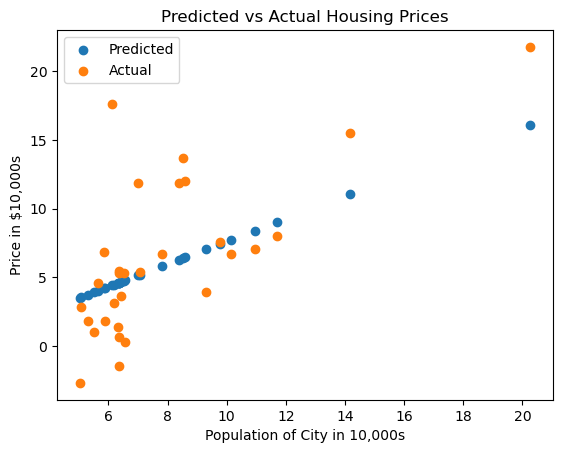

In [145]:
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(pop_X,pop_y,train_size=0.7)

model = keras.Sequential()
model.add(keras.layers.Input(1))
model.add(keras.layers.Dense(2))

model.compile(optimizer = keras.optimizers.Adam(learning_rate=5e-3),loss = keras.losses.MeanSquaredError(),metrics = ["accuracy"])

history = model.fit(X_train,y_train,batch_size=4,epochs=15)

preds = model.predict(X_test)

plt.scatter(X_test,preds[:,1])
plt.scatter(X_test,y_test)
plt.title("Predicted vs Actual Housing Prices")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Price in $10,000s")
plt.legend(["Predicted", "Actual"])

